In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [2]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.drop(105, axis =0, inplace=True)
df.drop(106, axis=0, inplace=True)

In [5]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.set_index('Month', inplace=True)

In [8]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

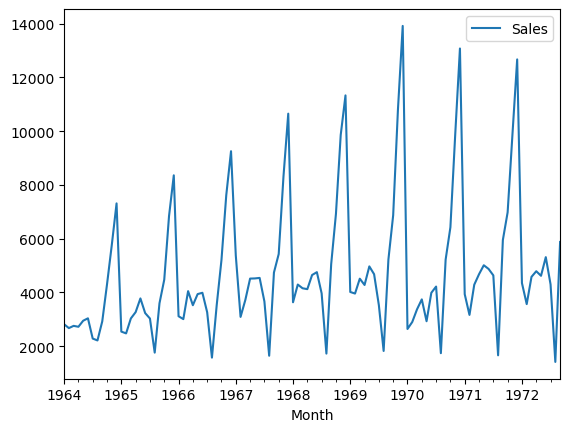

In [9]:
df.plot()

In [10]:
## testing for stationary 

from statsmodels.tsa.stattools import adfuller

test_results = adfuller(df['Sales'])

In [12]:
#H0 : It is not stationary
#H1 : It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics', 'p-value', '#Lags Used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(H0). reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
        

In [13]:
adfuller_test(df['Sales'])

ADF Test Statistics : -1.833593056327635
p-value : 0.36391577166023914
#Lags Used : 11
Number of Observations used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


## As we see the data is non stationary we will make it stationary

# Differencing

In [14]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [15]:
df

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [16]:
df['Sales Seasonal Difference'] = df['Sales'] - df['Sales'].shift(12)

In [17]:
df.head(14)

,Sales,Sales First Difference,Sales Seasonal Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [19]:
adfuller_test(df['Sales Seasonal Difference'].dropna())

ADF Test Statistics : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations used : 92
strong evidence against the null hypothesis(H0). reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

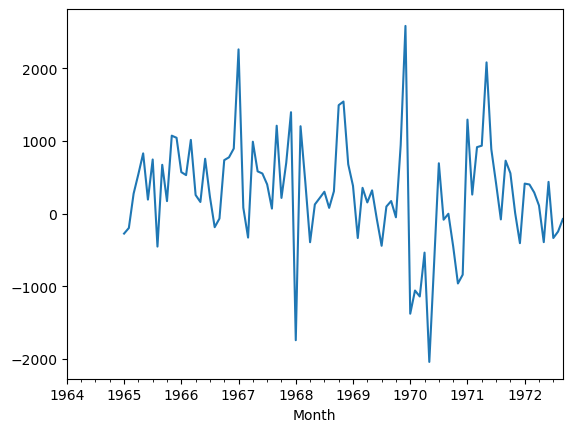

In [20]:
df['Sales Seasonal Difference'].plot()

# Auto Regressive Model

NameError: name 'plt' is not defined

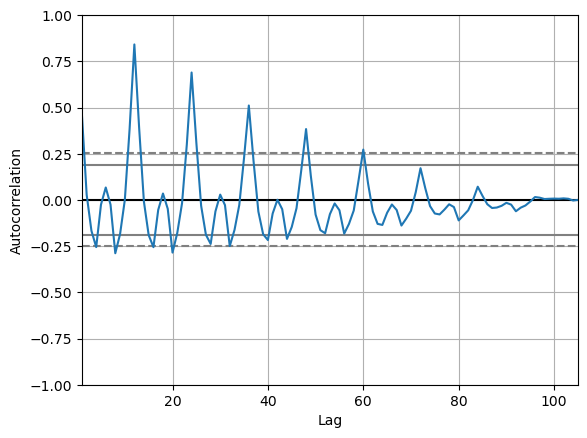

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm

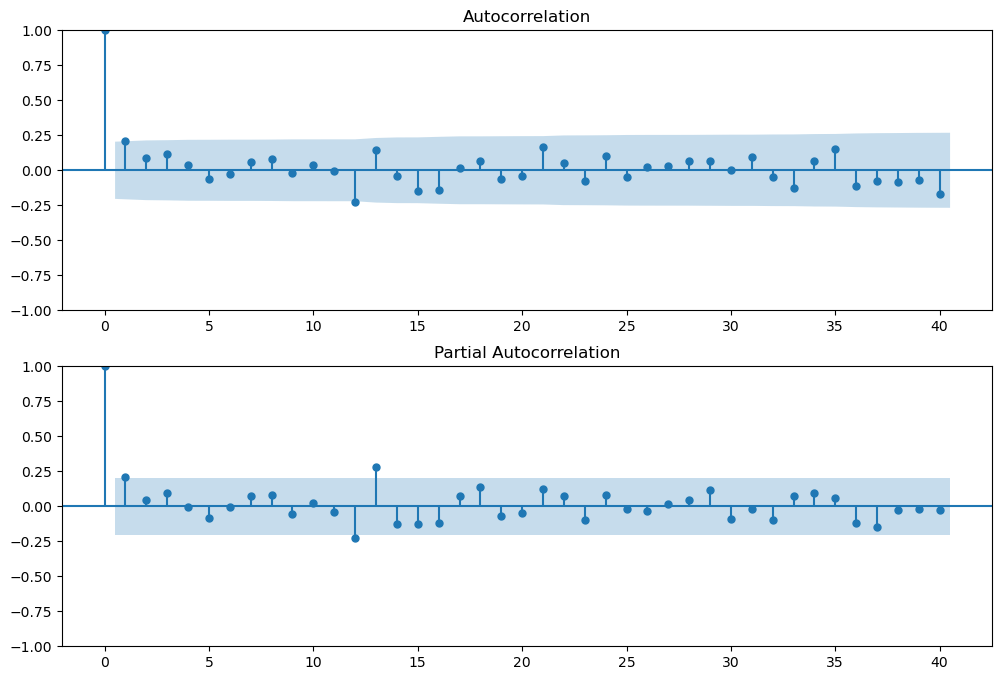

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales Seasonal Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales Seasonal Difference'].iloc[13:], lags=40, ax=ax2)

In [32]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results= model.fit()

C:\Users\MS\anaconda3\envs\data_mining\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MS\anaconda3\envs\data_mining\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

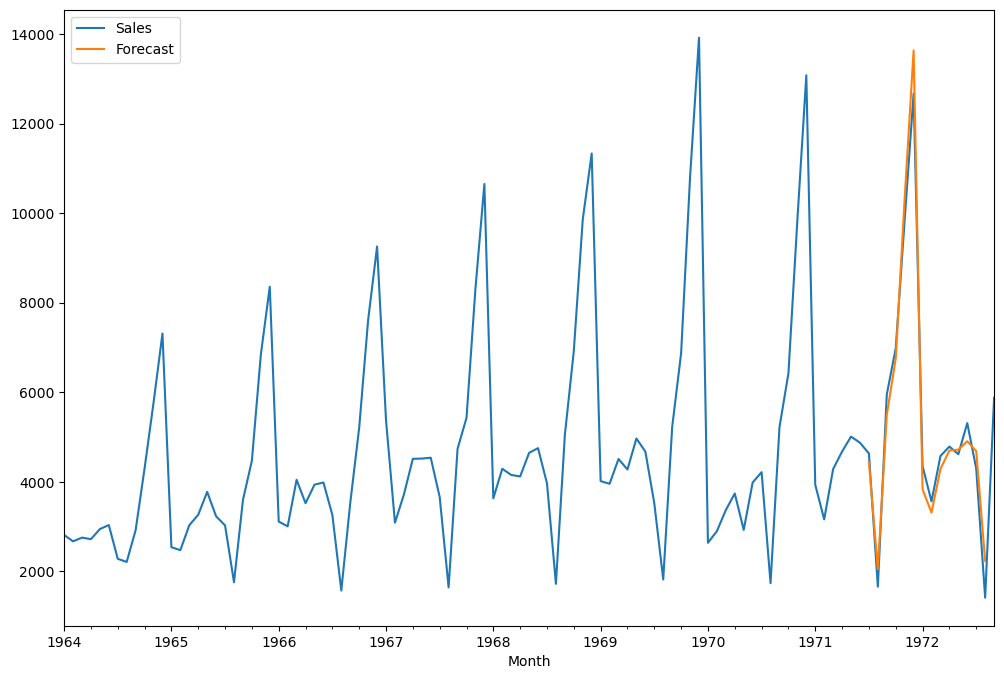

In [33]:
df['Forecast'] = results.predict(start=90, end=103,dynamic=True)
df[['Sales', 'Forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [36]:
future_dataset_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [37]:
future_dataset_df.tail()

,Sales,Sales First Difference,Sales Seasonal Difference,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [38]:
future_df = pd.concat([df, future_dataset_df])

C:\Users\MS\AppData\Local\Temp\ipykernel_71180\3046293642.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df, future_dataset_df])


<Axes: >

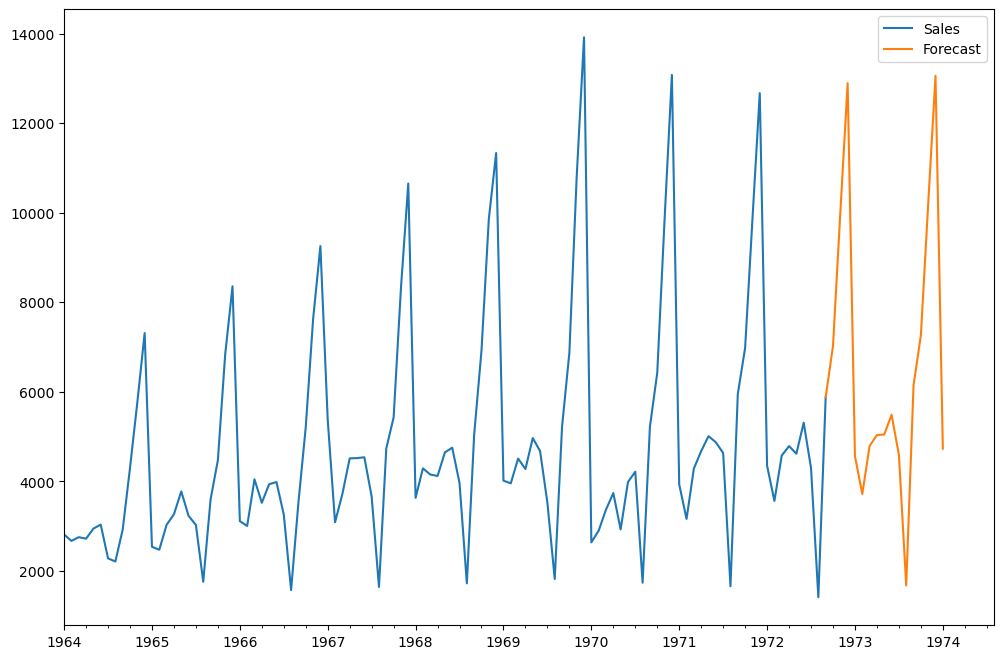

In [39]:
future_df['Forecast'] = results.predict(start=104, end=120,dynamic=True)
future_df[['Sales', 'Forecast']].plot(figsize=(12,8))